#Mask Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###### ---------------------------------------------------------------------


#### Importing libraries

In [ ]:
# required for CNN model creation, loss, optimization,model learning, prediction
import tensorflow as tf
#for image augmentation
from keras.preprocessing.image import ImageDataGenerator

## Step 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# using transformation during traing to avoid or minimize overfit , this will help to learn the model in a way that if:
# image has some pixels shift
# image get rotated
# Zoom-in or Zoom-out
#still model should be able to classify the image correctly.

#created a train_datagen object
#rescale to reduce the value size of each pixes as one pixal can have max value 255 so using multiplying each pixel with 1/255
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

#read images in a batch for training set
#batch_size to read all available images in a batch and as we have two classes Mask and non-Mask so using class_mode to binary
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/Train', target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

Found 600 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
# no transformation required here so only using rescale parameter
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/Test',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 100 images belonging to 2 classes.


### Preprocessing the validation set

In [ ]:
# no transformation required here so only using rescale parameter
validate_datagen=ImageDataGenerator(rescale=1./255)
validate_set=validate_datagen.flow_from_directory('/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/Validation',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 306 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
#Define a model
covid_Mask_check= tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
#filter value is arbitary, kernel size is 3X3 matrix, activation function is relu for non-linearity, input size is 64X64 and because images are colour images so using 3  (black and white images has x, y axies  and colour images have x,y,z axis)

covid_Mask_check.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

### Step 2 - Pooling

In [ ]:
# tf.keras.layers.MaxPool2D() :apply max pooling, first create feature map using convolution layer and then apply max pooling on feature map (select max pixel in each small squares)
# pool_size: in max pooling what would be the steps to select max pixel value, so if selected 2 means four small boxes or pixels will get considerd to select max pooling and then another 4 and so on..
#strides: in case 2 pixes are not avaiable then add false padding means false pixel

covid_Mask_check.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
#not passing input_size as this is second layer and we are not passing any direct input from outside and this layer will use output of first convolutional layer
covid_Mask_check.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
covid_Mask_check.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

covid_Mask_check.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
covid_Mask_check.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


### Step 3 - Flattening

In [ ]:
# this is required to pass input in vector form to Neural Network
covid_Mask_check.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
covid_Mask_check.add(tf.keras.layers.Dense(units=128, activation='relu'))
covid_Mask_check.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [ ]:
#as this is binary classification we are using sigmoid function , in case of multiclassification softmax should be used.
#using one neuron only at output as we have only 2 class.

covid_Mask_check.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
# using loss function binary cross entropy as this is binary classification to reduce loss, and optimizer as adam

covid_Mask_check.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#summary of the model
covid_Mask_check.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
covid_Mask_check.fit(x=training_set, validation_data= validate_set, epochs=15)

#Evaluate the model
loss_test, accuracy_test=covid_Mask_check.evaluate(test_set, verbose=0)
loss_training, accuracy_training=covid_Mask_check.evaluate(training_set, verbose=0)
print("-----------------------------------------")
print("accuracy of Model with Test data which is without image augmentation: {:5.2f}%".format(100*accuracy_test))
print("==================")
print("accuracy of Model with training data with image augmentation: {:5.2f}%".format(100*accuracy_training))

Epoch 1/15
19/19 [==============================] - 10s 542ms/step - loss: 0.1547 - accuracy: 0.9450 - val_loss: 0.2490 - val_accuracy: 0.9085
Epoch 2/15
19/19 [==============================] - 20s 1s/step - loss: 0.1806 - accuracy: 0.9300 - val_loss: 0.3590 - val_accuracy: 0.8464
Epoch 3/15
19/19 [==============================] - 10s 517ms/step - loss: 0.1681 - accuracy: 0.9350 - val_loss: 0.3314 - val_accuracy: 0.8725
Epoch 4/15
19/19 [==============================] - 9s 463ms/step - loss: 0.1443 - accuracy: 0.9433 - val_loss: 0.3812 - val_accuracy: 0.8268
Epoch 5/15
19/19 [==============================] - 9s 500ms/step - loss: 0.1224 - accuracy: 0.9550 - val_loss: 0.2787 - val_accuracy: 0.9216
Epoch 6/15
19/19 [==============================] - 10s 517ms/step - loss: 0.1134 - accuracy: 0.9517 - val_loss: 0.3979 - val_accuracy: 0.8301
Epoch 7/15
19/19 [==============================] - 8s 454ms/step - loss: 0.1001 - accuracy: 0.9567 - val_loss: 0.5474 - val_accuracy: 0.8007
Epoch

## Part 4 - Making a  prediction

In [16]:
import numpy as np
import keras.utils as img
import cv2
import os
from matplotlib import pyplot as plt
import matplotlib.colors as colors

In [17]:
def load_images_from_folder(folder,file):

    img=cv2.imread(os.path.join(folder,file))
    if img is not None:
        # images.append(img)
        return img

1/1 [==============================] - 0s 32ms/step
Masked images-----------------------------


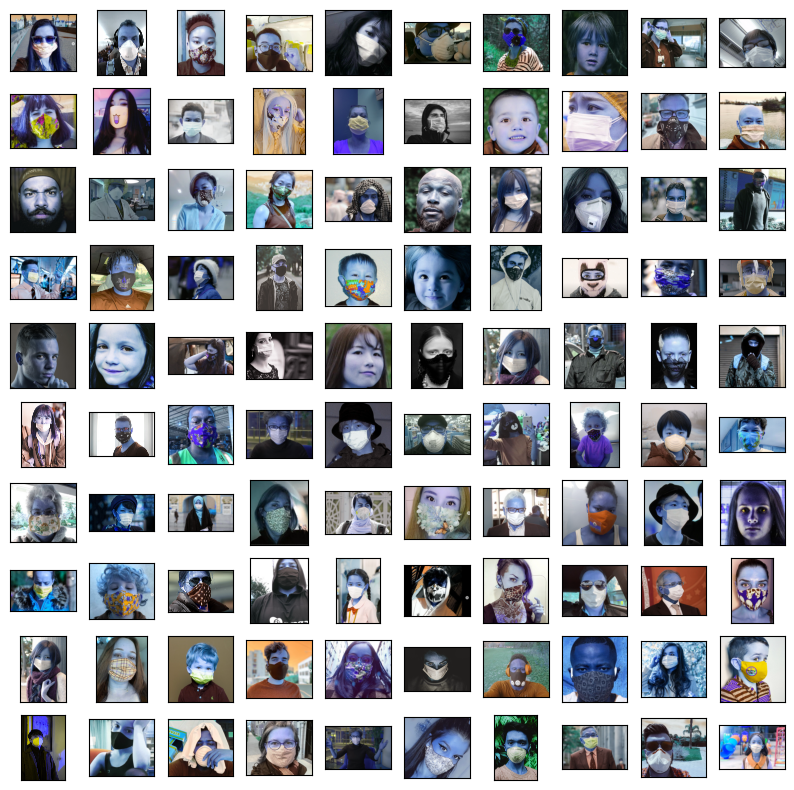

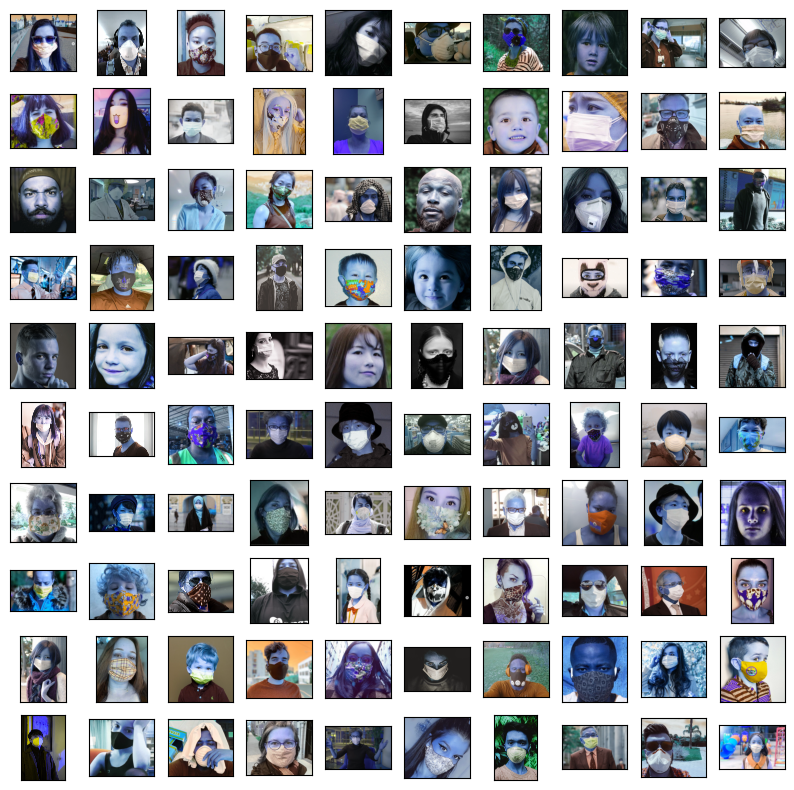

No-Masked images-----------------------------


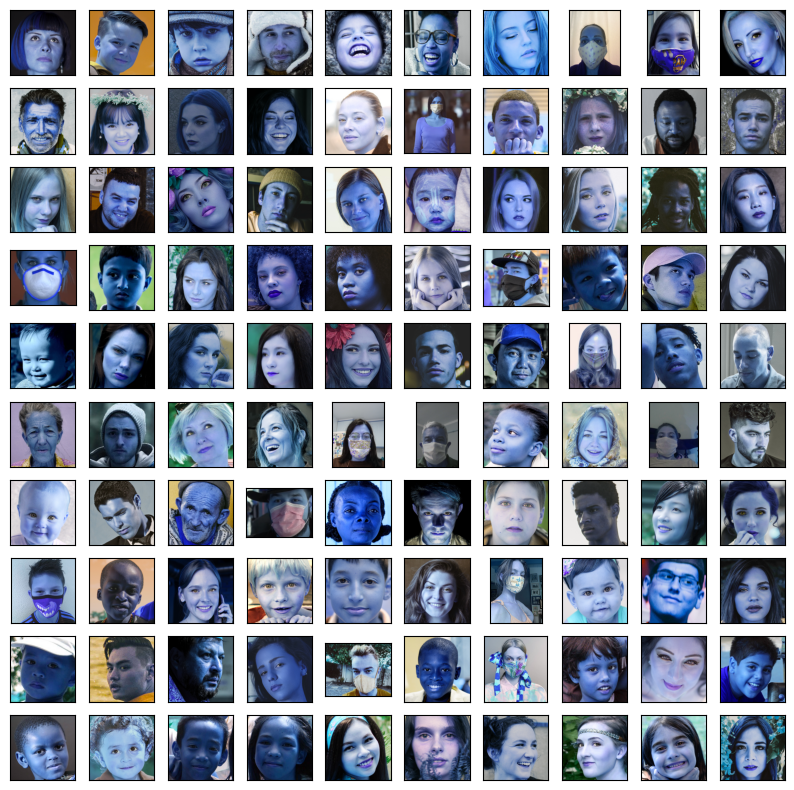

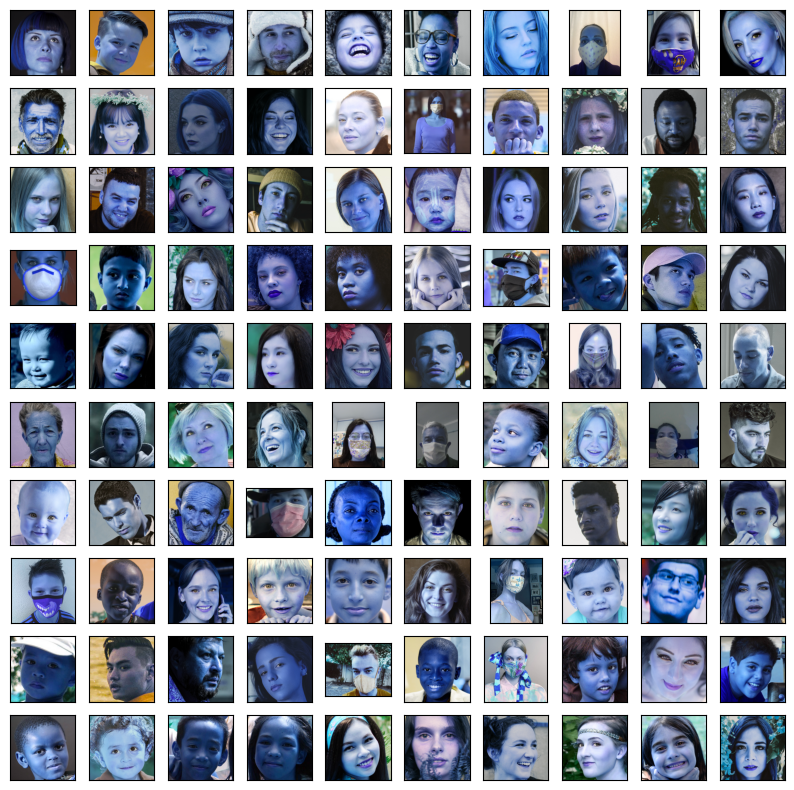

In [18]:

#size of any image should be same as the size used during training the model

mask_images=[]
no_mask_images=[]
validate_All_images_path= '/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/mix'


for mask_no_mask in os.listdir(validate_All_images_path):

    # if(True):

        # file=1
    # if file is not None:
        temp='/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/mix/'+mask_no_mask

        prod_image=img.load_img(temp,target_size=(64,64))
        #convert that one single image into array
        prod_image=img.img_to_array(prod_image)
        #as used batches of 32 images, passed image should be in same dimension , here it     is 1D
        prod_image=np.expand_dims(prod_image, axis=0)
        result=covid_Mask_check.predict(prod_image)
        if result[0][0] == 0 :
            prediction = 'Mask'
            images_masked=load_images_from_folder('/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/mix',mask_no_mask)
            mask_images.append(images_masked)
        else:
            prediction= 'Non-mask'
            images_unmasked=load_images_from_folder('/content/drive/MyDrive/Covid-Mask-Detection-main/covid_dataset/mix',mask_no_mask)
            no_mask_images.append(images_unmasked)

rows, cols=10,10
print("Masked images-----------------------------")
for i in range (0, len(mask_images), rows*cols):
    fig=plt.figure(figsize=(10,10))
    for j in range(1, cols*rows+1):
        fig.add_subplot(rows, cols, j)
        plt.imshow(mask_images[j-1])
        plt.xticks([])
        plt.yticks([])

    plt.show()
print("No-Masked images-----------------------------")
for i in range (0, len(no_mask_images), rows*cols):
    fig=plt.figure(figsize=(10,10))
    for j in range(1, cols*rows+1):
        fig.add_subplot(rows, cols, j)
        plt.imshow(no_mask_images[j-1])
        plt.xticks([])
        plt.yticks([])

    plt.show()